<a href="https://colab.research.google.com/github/ramirezvillanadialidia-byte/EDPII/blob/main/EXAMEN_EXTRAORDINARIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 5.18 – Metodo Elementos Finitos, criterio de Richardson

Se resuelve el problema:
- u'' = 1 - x^2  en (0,1),  u(0)=u(1)=0

Usando elementos finitos lineales,  con **N = 4**.

In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x = sp.symbols('x')
f = 1 - x**2

In [17]:
u_exact = sp.integrate(sp.integrate(x**2 - 1, x), x)
C1, C2 = sp.symbols('C1 C2')
u_exact += C1*x + C2
C = sp.solve([u_exact.subs(x,0), u_exact.subs(x,1)], [C1, C2])
u_exact = u_exact.subs(C)

In [18]:
def fem_solution(h):
    nodes = [i*h for i in range(int(1/h)+1)]
    n = len(nodes) - 2

    K = sp.zeros(n,n)
    for i in range(n):
        K[i,i] += 2/h
        if i > 0: K[i,i-1] += -1/h
        if i < n-1: K[i,i+1] += -1/h

    F = sp.zeros(n,1)
    for e in range(len(nodes)-1):
        xi, xi1 = nodes[e], nodes[e+1]
        phi_i = (x-xi1)/(xi-xi1)
        phi_j = (x-xi)/(xi1-xi)
        Fi = sp.integrate(f*phi_i, (x,xi,xi1))
        Fj = sp.integrate(f*phi_j, (x,xi,xi1))
        if e-1 >= 0 and e-1 < n: F[e-1] += Fi
        if e < n: F[e] += Fj

    return K.LUsolve(F), nodes

In [30]:
print("TODOS LOS NODOS FEM:")
for i, xi in enumerate(nodes_h):
    print(f"Nodo {i}: x = {xi}")


TODOS LOS NODOS FEM:
Nodo 0: x = 0
Nodo 1: x = 0.25
Nodo 2: x = 0.5
Nodo 3: x = 0.75
Nodo 4: x = 1


Aquí implemente FEM con elementos lineales, arma la matriz de rigidez, el vector de cargas y resuelve el sistema para un tamaño de malla dado.

In [19]:
u_h, nodes_h = fem_solution(sp.Rational(1,4))
u_h2, nodes_h2 = fem_solution(sp.Rational(1,8))

Se calcula la solución FEM dos veces, usando dos tamaños de malla distintos:

ℎ=1/4 que es la malla más gruesa

ℎ=1/8 que es la malla más fina

In [20]:
u_R = [(4*u_h2[2*i+1] - u_h[i])/3 for i in range(len(u_h))]

Aquí apliqué Richardson combinando las soluciones FEM con malla
ℎ y h/2 para reducir el error.

In [31]:
print("NODOS FEM (h = 1/4):")
for i in range(1, len(nodes_h)-1):
    print(f"x_{i} = {nodes_h[i]}")

NODOS FEM (h = 1/4):
x_1 = 0.25
x_2 = 0.5
x_3 = 0.75


In [25]:
print("SOLUCIÓN FEM:")
for i, ui in enumerate(u_h):
    print(f"u_FEM({nodes_h[i+1]}) = {ui.evalf()}")

SOLUCIÓN FEM:
u_FEM(1/4) = 0.0732421875000000
u_FEM(1/2) = 0.0885416666666667
u_FEM(3/4) = 0.0576171875000000


In [26]:
print("SOLUCIÓN RICHARDSON:")
for i, ui in enumerate(u_R):
    print(f"u_R({nodes_h[i+1]}) = {ui.evalf()}")

SOLUCIÓN RICHARDSON:
u_R(1/4) = 0.0732421875000000
u_R(1/2) = 0.0885416666666667
u_R(3/4) = 0.0576171875000000


Aquí solo se comparan los resultados

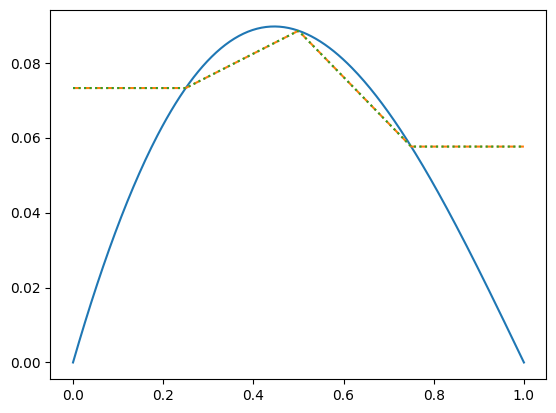

In [22]:

xx = np.linspace(0,1,300)

u_exact_vals = [float(u_exact.subs(x,xi)) for xi in xx]
u_fem_vals = np.interp(xx, nodes_h[1:-1], [float(ui) for ui in u_h])
u_R_vals = np.interp(xx, nodes_h[1:-1], [float(ui) for ui in u_R])

plt.plot(xx, u_exact_vals, label="Exacta")
plt.plot(xx, u_fem_vals, '--', label="FEM")
plt.plot(xx, u_R_vals, ':', label="Richardson")


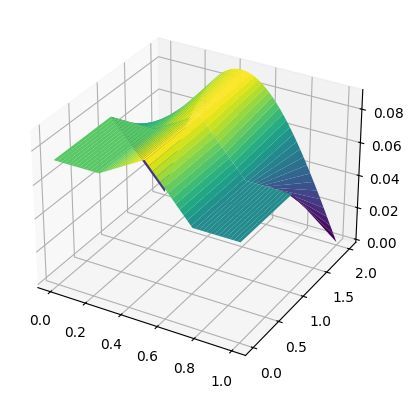

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

X = np.array(xx)
Y = np.array([0, 1, 2])   # FEM, Richardson, Exacta

Xg, Yg = np.meshgrid(X, Y)
Z = np.zeros_like(Xg)

Z[0, :] = u_fem_vals
Z[1, :] = u_R_vals
Z[2, :] = u_exact_vals

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(Xg, Yg, Z, cmap='viridis')



"""
Las formulas que se utilizaron:
Función fuente, el problema:
f(x) = 1 - x^2

Funciones de forma lineal por elemento :
phi_i(x) = (x - x_{i+1}) / (x_i - x_{i+1})
phi_{i+1}(x) = (x - x_i) / (x_{i+1} - x_i)

Vector de cargas :
F_i = integral(f(x) * phi_i(x), x_i, x_{i+1})
F_{i+1} = integral(f(x) * phi_{i+1}(x), x_i, x_{i+1})

Matriz de rigidez local:
K_local = 1/h * [1, -1], [-1, 1]]

Extrapolación de Richardson:
u_R = (4 * u_{h/2} - u_h) / 3
"""
